# Stack Overflow

## Introduction 

In the second part of this assignment, you will choose to create and analyze time series of creation dates of Stack Overflow questions, or Stack Overflow answers. You need to choose only one of the two, but please mention clearly what kind of time series you created. This assignment is to be completed **INDIVIDUALLY** and is due on **October 6 at 5pm**.

As stated above, you need to create time series of Stack Overflow questions, or answers using their creation dates. In order to do so you should use the information derived from Homework 1.1. Note that the focus of this homework is not on data collection, but on data analysis and interpretation so do not worry if you did not collect all data in the previous homework.

You are going to analyze users. If you selected to create time series of questions take the top 100 users with the most question posts, while if you created time series of answers take the top 100 users with the highest answer scores. For each user, your time series will be the number of questions (for questions), or the score value (for answers) posted by that user at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at a certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze users asking questions and sample during different hours of the day, your hypothesis could be that some users ask more questions during night hours because they are students, while others are more active during day time because they work in industry.   

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data (your hypothesis), what timeseries you created, what method you chose and why. Providing us with novel, or more than one hypotheses/analyses will give you extra credit. **(20 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import pairwise_distances
import math
import copy
import calendar

row_data = pd.read_csv('data.csv', header = None, names = ['Id', 'CreationDate','OwnerUserId','Tags','ViewCount','Score','Type','ParentId'])
data_answers = row_data[row_data['Type'] == 'A']
data_questions = row_data[row_data['Type'] == 'Q']
merge_data = pd.merge(left = data_answers, right = data_questions, left_on ='ParentId', right_on = 'Id')
top_100users = merge_data.groupby(['OwnerUserId_x'])['Score_x'].sum().nlargest(100)
top_100users = pd.DataFrame(top_100users)
top_100ID = list(top_100users.index)

scores_list = []
for i in range(100):
    subset = row_data[row_data['OwnerUserId'] == top_100ID[i]]
    date = subset['Score']
    date.index = pd.DatetimeIndex(subset['CreationDate'])
    df = pd.DataFrame(date)
    monthly_summary = pd.DataFrame()
    monthly_summary['Score'] = df.Score.resample('M').sum()
    dfList = monthly_summary['Score'].tolist()
    scores_list.append(dfList)
for i in range(len(scores_list)):
    for j in range(len(scores_list[i])):
        if math.isnan(scores_list[i][j]) == True:
            scores_list[i][j] = 0

# However there are cases where lists size are not 12, we want to find them out and pad with zeros
            
check_list = []  # check_list =  [12, 21, 25, 26, 40, 47, 73, 84, 87, 89, 90, 96]
for i in range(len(scores_list)):
    if len(scores_list[i]) != 12:
        check_list.append(i)
print("You need to check the following index rows on you nested list as their lens is not 12:", check_list)
# Go back and check them one by one to make sure where to add zeros

# First make a deep copy 
Final_list = copy.deepcopy(scores_list)

# 12 
Final_list[12].insert(0, 0)
# 21
for i in range(3):
    Final_list[21].insert(i, 0)
#25 
for i in range(4):
    Final_list[25].insert(i, 0)
Final_list[25].insert(11,0)
#26
for i in range(4):
    Final_list[26].insert(i, 0)
#40
for i in range(5,12):
    Final_list[40].insert(i, 0)
#47
Final_list[47].insert(0, 0)
#73
for i in range(2):
    Final_list[73].insert(i, 0)
#84
for i in range(10,12):
    Final_list[84].insert(i, 0)
 
#87
for i in range(10,12):
    Final_list[87].insert(i, 0)
#89
Final_list[89].insert(0, 0)
for i in range(8,12):
    Final_list[89].insert(i, 0)
#90
Final_list[90].insert(11,0)

#96
for i in range(6):
    Final_list[96].insert(i, 0)

# Check if all 100 lists have len 12
Doule_check_list = []
for i in range(len(Doule_check_list)):
    if len(Doule_check_list[i]) != 12:
        Doule_check_list.append(i)
if len(Doule_check_list) == 0:
    print("Success! All nested list have length 12")

You need to check the following index rows on you nested list as their lens is not 12: [12, 21, 25, 26, 40, 47, 73, 84, 87, 89, 90, 96]
Success! All nested list have length 12


My hypothesis: These users are more active on average in April becuase when finals come, lots of questions get posted that users tend to answer them more frequently. Users may become less active in Dec and therefore lower scores as most people are spending their Christmas time. To test my hypothesis, I am creating the time series graph on the average scores of top 100 users from Jan to Dec. As the time series graph shown below, it validates my hypothesis!  

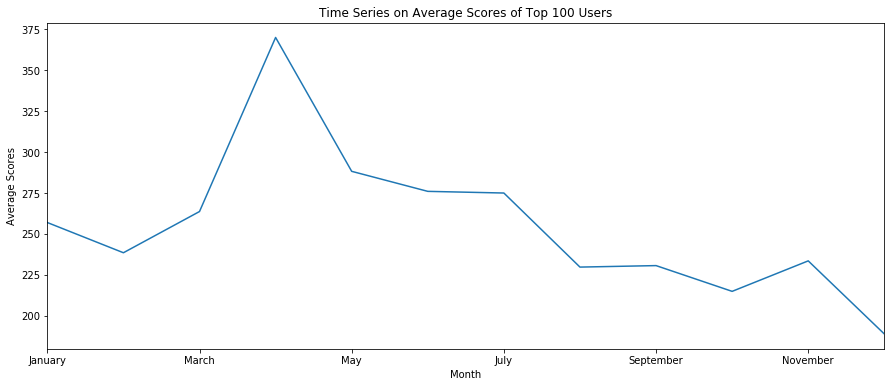

In [13]:
Month_list = []
for month in calendar.month_name[1:]:
    Month_list.append(month)

Final_df = pd.DataFrame(Final_list[:],columns = Month_list)

# Calculate Average scores each months
avrage_score = Final_df.mean(axis = 0)
avrage_score.plot(figsize=(15, 6))
plt.xlabel('Month')
plt.ylabel('Average Scores')
plt.title('Time Series on Average Scores of Top 100 Users')
plt.show()  
# It validates my hypothesis!


Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

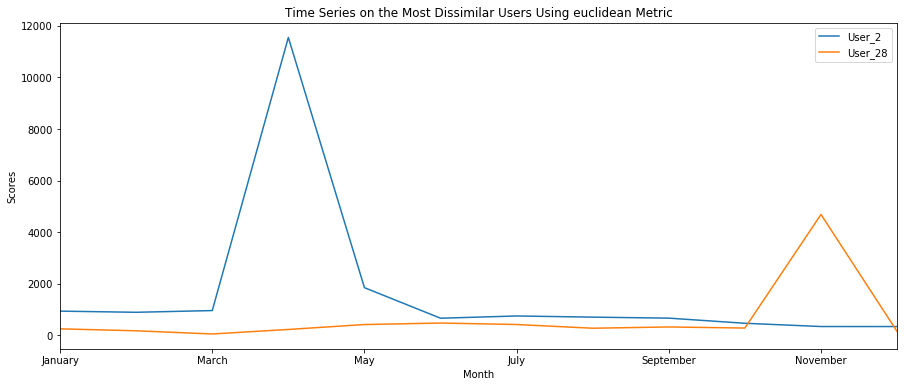

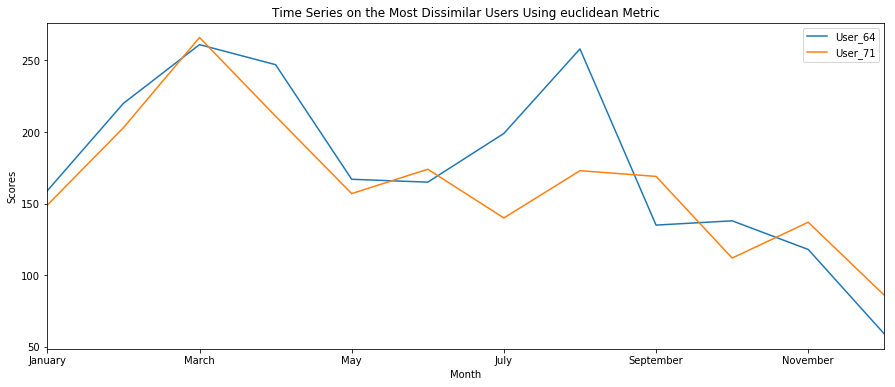

In [15]:
# The metric I am using is "euclidean"
dis_mat = pd.DataFrame(distance_matrix(Final_df.values, Final_df.values), index=Final_df.index, columns=Final_df.index)
euc_result = pairwise_distances(Final_list, metric ='euclidean')

def dissimilar(F):
    ind = np.unravel_index(np.argmax(F),F.shape) 
    return ind 

def similar(M):
    F_list = copy.deepcopy(M)
    max_rep = F_list[dissimilar(F_list)]
    for i in range(len(F_list)):
        for j in range(len(F_list[0])):
            if i == j:
                F_list[i][j] = max_rep
    ind = np.unravel_index(np.argmin(F_list),F_list.shape)
    return ind 

euc_result_dis = dissimilar(euc_result)#(2,28) 
euc_result_sim = similar(euc_result)#(64,71)

def display_data(f,index_cor,met):
    hoo_dis = f.ix[list(index_cor)]
    hoo_dis = np.transpose(hoo_dis)
    user_top = 'User_' + str(index_cor[0])
    user_down = 'User_' + str(index_cor[1])
    hoo_dis.columns = [user_top,user_down]
    hoo_dis.plot(figsize=(15, 6))
    plt.xlabel('Month')
    plt.ylabel('Scores')
    plt.title('Time Series on the Most Dissimilar Users Using ' + met +' Metric')
    plt.show()  

display_data(Final_df,euc_result_dis,'euclidean')
display_data(Final_df,euc_result_sim,'euclidean')

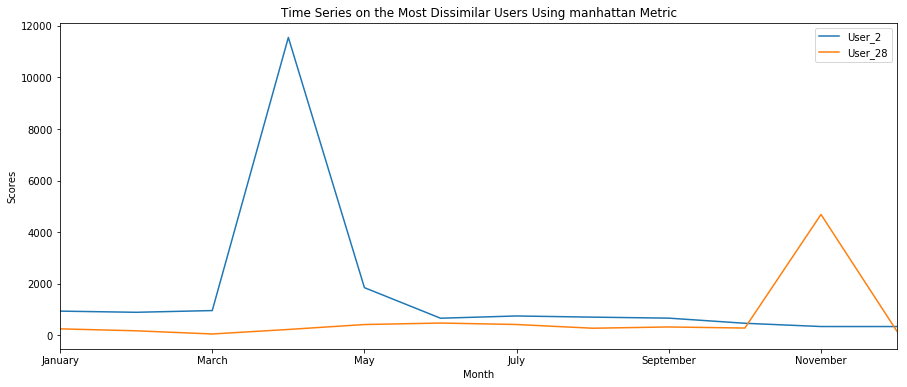

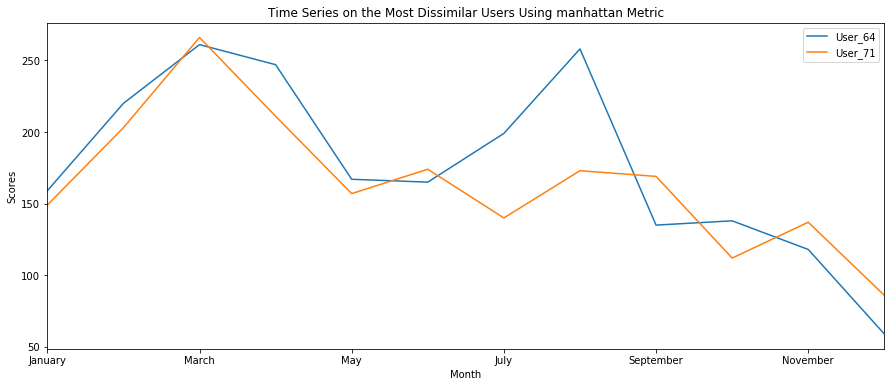

In [11]:
'''An alternative of euclidean metric could be manhattan. In this case they yeild the same result, as 
when d = square of difference is maxmized, the square root of d is also maxmized'''
man_result = pairwise_distances(Final_list, metric ='manhattan')
man_result_dis = dissimilar(man_result)
man_result_sim = similar(man_result)
display_data(Final_df,man_result_dis,'manhattan')
display_data(Final_df,man_result_sim,'manhattan')

What are your interpretation/conclusions from the above plotting comparisons? **(5 pts)**

Answer: We can find out the most dissimilar users is (2,28) and the most slimilar users is (64,71) using euclidean metric. I think the time series graph makes sensen intuitively. User_2 is so active on April that the square of difference between User_2 score and that of any other users in the month of April will greatly contribute to dissimilar metric, which already seperate User_2 from all other users. Plus, User_28 does not have relatively high scores through the year until November. However, User_2 becomes less active at the same time. As their sqaure of difference scores become bigger, they become more dissimilar. As for the most similar users (64,71), their time series pretty much have the same trend, causing their distance to be small

Choose a different distance/similarity metric and repeat the same time series analysis. **(5 pts)**

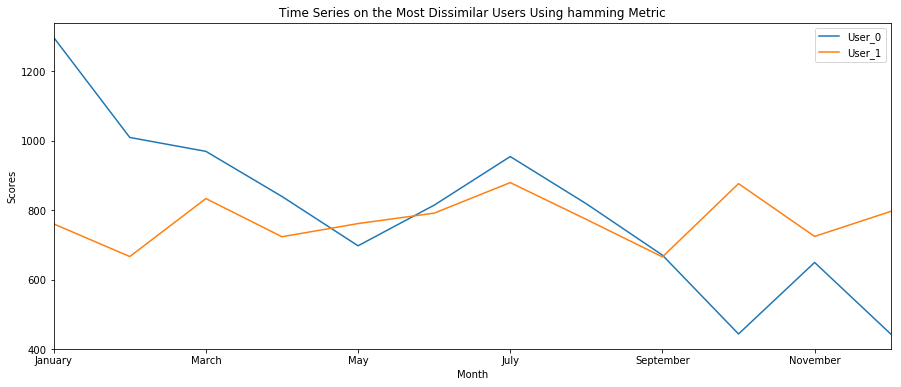

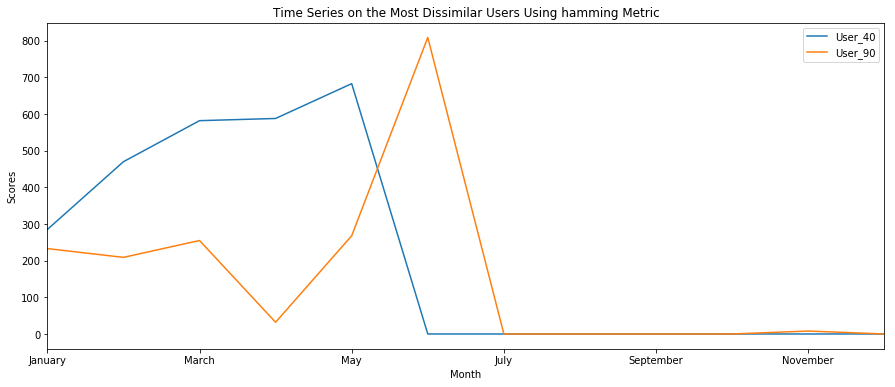

In [12]:
# The different distance/similarity metric I am using is "hamming"
ham_result = pairwise_distances(Final_list, metric ='hamming')
ham_result_dis = dissimilar(ham_result)#(0,1)
ham_result_sim = similar(ham_result)#(40,90)
display_data(Final_df,ham_result_dis,'hamming')
display_data(Final_df,ham_result_sim,'hamming')

Compare the two different metrics you used and report any observations. Why did you select the specific metrics? Which do you think performed better based on the results you were expecting and why? **(5 pts)**

Answer: This time let's try hamming distance, a metric that counts in the number of positions at which the corresponding symbols are different. For intance, the hamming distance between (3000,1000) is 1 whereas (300,299) is 3. This is not good metrics because the distance beween (3000,1000) is 1000 times greater than (300,299) while the latter has bigger distance under the standard of hamming metrics. Therefore, I believe euclidean performed better based on the results I am expecting. The simple reason lies on the fact that I want to find the distance between two vectors, not how many postions they are different.